# Data Mining - assignment #1
## Fourth Approach: FP-Growth Algorithm

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import fpgrowth,  association_rules
import matplotlib.pyplot as plt

### Read true.csv file and label it with 1

In [2]:
true_df = pd.read_csv(r"True.csv", sep=',')
true_df['label'] = 1
true_df.sample(5)

,title,text,subject,date,label
19550,German court finds Syrian guilty over U.N. pea...,BERLIN (Reuters) - A Syrian man living in Germ...,worldnews,"September 20, 2017",1
3340,Missouri governor calls special session on abo...,(Reuters) - Missouri’s Republican governor on ...,politicsNews,"June 7, 2017",1
2869,China's Xi reiterates commitment to resolving ...,BEIJING (Reuters) - Chinese President Xi Jinpi...,politicsNews,"July 8, 2017",1
20861,U.S. military says airstrike in Somalia kills ...,NAIROBI (Reuters) - The U.S. military killed t...,worldnews,"September 6, 2017",1
8205,"Clinton, Trump escalate fight in dramatic week...",WASHINGTON/NEW YORK (Reuters) - Presidential c...,politicsNews,"September 9, 2016",1


### Read fake.csv file and label it with 0

In [3]:
fake_df = pd.read_csv(r"Fake.csv", sep=',') 
fake_df['label'] = 0
fake_df.sample(5)

,title,text,subject,date,label
16041,"NEWT GINGRICH: Why Obama, NOT TRUMP, Should Te...",Former Speaker Newt Gingrich discusses the Rus...,Government News,"Jun 28, 2017",0
1877,Seth Meyers SLAMS Trump’s Defense Of ‘State T...,"On Wednesday night s episode of Late Night, ho...",News,"April 6, 2017",0
20777,WOW! VIDEO SURFACES OF BERNIE SANDERS Praising...,Please share this everywhere! Especially to an...,left-news,"Apr 5, 2016",0
1461,Ivanka Trump’s Hypocritical Mother’s Day Mess...,Ivanka Trump really should stop talking about ...,News,"May 15, 2017",0
14097,SEE GEORGE STEPHANOPOULOS’ Reaction When Hilla...,I don t really know about that Nice try Hi...,politics,"Apr 17, 2016",0


### Combine true and fake news in one dataframe

In [4]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
1699,Six Dreamers sue Trump administration over DAC...,SAN FRANCISCO (Reuters) - San Diego attorney D...,politicsNews,"September 21, 2017",1
8914,Puerto Rico's PREPA says will make full debt p...,SAN JUAN (Reuters) - Puerto Rico’s semi-public...,politicsNews,"June 30, 2016",1
37012,SHARPTON SHAKES DOWN PASTORS FOR DONATIONS AT ...,Hey Al Why don t you try going into the neigh...,politics,"Jun 8, 2015",0
10989,"As his stature rises, Rubio becomes ripe targe...","LACONIA, N.H. (Reuters) - Marco Rubio finished...",politicsNews,"February 3, 2016",1
8974,TransCanada formally seeks NAFTA damages in Ke...,TORONTO (Reuters) - TransCanada Corp is formal...,politicsNews,"June 25, 2016",1
34075,ANTI-HILLARY POSTERS POP UP All Over Hollywood...,The first time I heard Negan ask for 50 perc...,politics,"Oct 22, 2016",0
3759,Mexico expects NAFTA talks by late August: eco...,MEXICO CITY (Reuters) - Mexican Economy Minist...,politicsNews,"May 16, 2017",1
13745,Hariri says Hezbollah must remain neutral to e...,PARIS (Reuters) - Lebanese Prime Minister Saad...,worldnews,"November 27, 2017",1
40738,NICOLE KIDMAN BREAKS RANKS With Hollywood Left...,She s travelling the world to promote her new ...,left-news,"Jan 12, 2017",0
36092,Taxpayer Funded Left-Wing Church Organization ...,"This isn t just any church organization, this ...",politics,"Jan 10, 2016",0


### Produce a Frequency-Term Table out of the datafarame

In [5]:
vectorizer = CountVectorizer(stop_words='english', min_df=1000, token_pattern=r'[a-zA-Z]{2,}', binary=True)
matrix = vectorizer.fit_transform(all_news_df['title']+' '+all_news_df['text'])

In [6]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(10)

,abc,ability,able,absolutely,accept,access,according,account,accounts,accusations,...,written,wrong,wrote,year,years,yes,yesterday,york,young,youtube
44168,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
28779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
31820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
26289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
34361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23033,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21197,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Produce Frequent Itemsets

In [7]:
freq_items = fpgrowth(sparse_df, min_support=0.1, use_colnames=True)
freq_items

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.732460,(said)
1,0.529110,(president)
2,0.504967,(trump)
3,0.483028,(reuters)
4,0.431779,(people)
...,...,...
1134,0.114036,"(featured, image, donald)"
1135,0.113814,"(featured, image, donald, trump)"
1136,0.111208,"(featured, said, image)"
1137,0.105194,"(featured, like, image)"


### List the top 20 popular words

In [8]:

freq_words = freq_items[freq_items["itemsets"].apply(len) == 1]
frequent_words_sorted = freq_words.sort_values(by='support', ascending=False)
top_20 = frequent_words_sorted.head(20)
top_20

,support,itemsets
0,0.732460,(said)
1,0.529110,(president)
2,0.504967,(trump)
3,0.483028,(reuters)
4,0.431779,(people)
5,0.412602,(donald)
86,0.360706,(new)
115,0.343846,(just)
6,0.337922,(told)
145,0.321217,(state)


### Bar plot visualization of the 20 top popular words

C:\Users\ibrahima\AppData\Local\Temp\ipykernel_15436\4011254877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


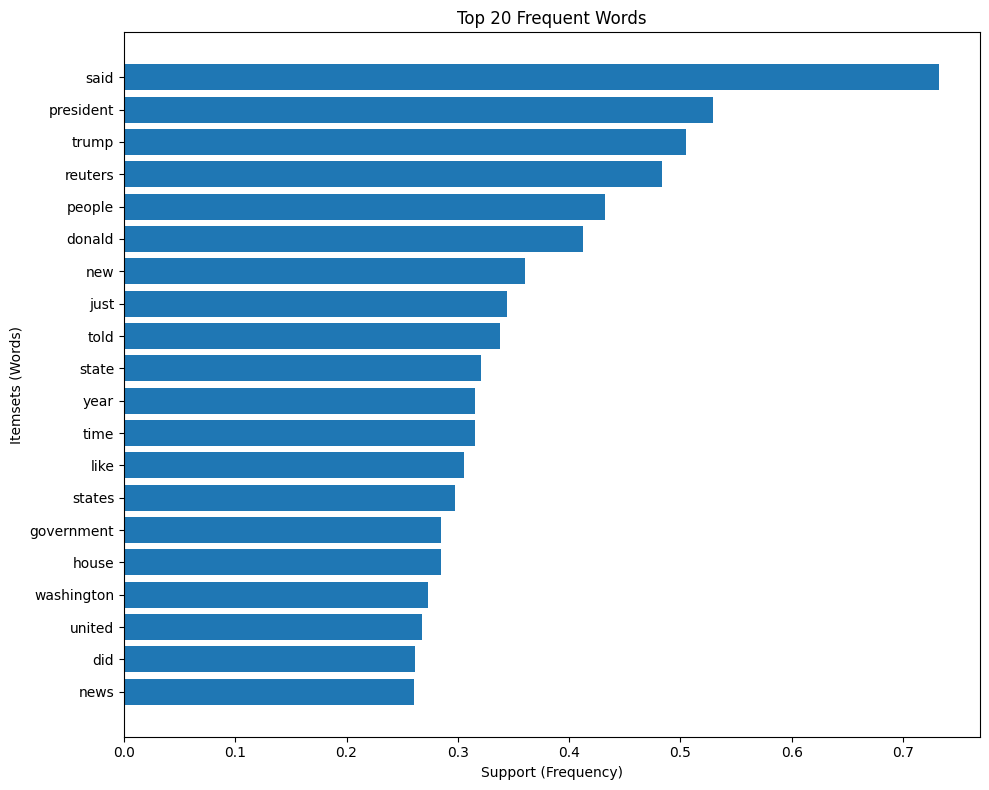

In [9]:
top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.figure(figsize=(10, 8))
plt.barh(top_20['itemsets_str'], top_20['support'])
plt.xlabel('Support (Frequency)')
plt.ylabel('Itemsets (Words)')
plt.title('Top 20 Frequent Words')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Generate association rules out of the frequent Itemsets

In [10]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.9)
print(f"{len(rules)} rules generated.")
rules_sorted = rules.sort_values(by='lift', ascending=False)
rules_sorted.head(20)

330 rules generated.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
325,"(image, donald)","(featured, trump)",0.124193,0.139294,0.113814,0.916428,6.579112,1.0,0.096514,10.298926,0.968254,0.760417,0.902902,0.866752
324,"(featured, donald)","(image, trump)",0.119805,0.145730,0.113814,0.949991,6.518827,1.0,0.096354,17.082218,0.961830,0.750147,0.941460,0.865489
278,"(said, hillary)",(clinton),0.114704,0.168493,0.106842,0.931456,5.528159,1.0,0.087515,12.131051,0.925237,0.605835,0.917567,0.782780
277,"(clinton, said)",(hillary),0.116843,0.173838,0.106842,0.914411,5.260118,1.0,0.086530,9.652658,0.917040,0.581173,0.896402,0.764509
276,"(clinton, trump)",(hillary),0.122856,0.173838,0.110940,0.903009,5.194531,1.0,0.089583,8.517957,0.920590,0.597242,0.882601,0.770595
160,"(united, said, donald, president)","(states, trump)",0.111631,0.182235,0.105149,0.941939,5.168809,1.0,0.084806,14.084662,0.907879,0.557182,0.929001,0.759469
150,"(said, united, donald)","(states, trump)",0.123792,0.182235,0.116598,0.941886,5.168514,1.0,0.094038,14.071629,0.920467,0.615520,0.928935,0.790852
142,"(united, donald, president)","(states, trump)",0.126732,0.182235,0.119070,0.939543,5.155659,1.0,0.095975,13.526399,0.923013,0.627023,0.926070,0.796464
135,"(united, donald)","(states, trump)",0.143592,0.182235,0.134639,0.937645,5.145246,1.0,0.108471,13.114749,0.940727,0.704217,0.923750,0.838231
251,(barack),"(obama, president)",0.119137,0.184819,0.110562,0.928024,5.021260,1.0,0.088543,11.325724,0.909161,0.571692,0.911705,0.763120


### Scatterplot of the rules was generated (between support and confidence)

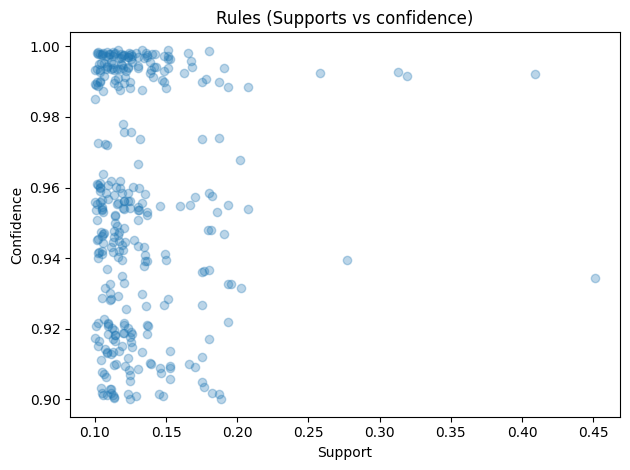

In [11]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.3)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Rules (Supports vs confidence)')
plt.gca()
plt.tight_layout()

In [12]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(reuters),(said),0.483028,0.732460,0.451267,0.934246,1.275491,1.0,0.097468,4.068818,0.417795,0.590493,0.754228,0.775172
1,"(reuters, president)",(said),0.295136,0.732460,0.277251,0.939401,1.282528,1.0,0.061076,4.414906,0.312528,0.369497,0.773495,0.658960
2,"(reuters, trump)",(said),0.217426,0.732460,0.202548,0.931571,1.271839,1.0,0.043292,3.909765,0.273120,0.271026,0.744230,0.604051
3,"(reuters, president, trump)",(said),0.191946,0.732460,0.179785,0.936644,1.278765,1.0,0.039192,4.222816,0.269778,0.241445,0.763191,0.591049
4,"(reuters, people)",(said),0.178159,0.732460,0.170564,0.957370,1.307060,1.0,0.040070,6.275808,0.285851,0.230475,0.840658,0.595117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,"(image, donald)","(featured, trump)",0.124193,0.139294,0.113814,0.916428,6.579112,1.0,0.096514,10.298926,0.968254,0.760417,0.902902,0.866752
326,"(featured, said)",(image),0.117912,0.207470,0.111208,0.943143,4.545920,1.0,0.086744,13.939045,0.884291,0.519239,0.928259,0.739580
327,"(like, featured)",(image),0.109983,0.207470,0.105194,0.956460,4.610107,1.0,0.082376,18.202381,0.879854,0.495593,0.945062,0.731746
328,"(just, featured)",(image),0.130273,0.207470,0.124549,0.956061,4.608183,1.0,0.097521,18.036990,0.900276,0.584204,0.944558,0.778191


## Analyze the association rules based on top words of fake and true news:
- Since the generated association rules of the FP-Growth algorithm was the same as the rules generated through Normal Apriori algorithm, then we will select the same set of rules that we selected when we used Apriori algorithm. Please refer to apriori-approach file for more details.  

## Summary

* Some of the words at the antecedent and consequent of these rules are belonging to both the popular words of Fake and Real News.  for example the word "said". Also The words are part of multiple news subjects like "featured" in (news) subject, and "president, minister" in (politics/middle-east) subjects".

* Some recommendations based on the discovered rule that might help understanding and identifying fake news from true news:
    * if a news record satisfies one of the following rules, there is a good chance it is true news:
    (We picked the previous rules because they contains formal news words and a name of well known news agency. )
        - (reuters)	--> (said)
        - (said, minister) ---> (reuters)
        - (reuters, government) --> (said)
        - (house, reuters, president) --> (said)
        - (donald, trump, said, reuters) ---> (said)
    * if a news record satisfies one of the following rules,  there is a good chance it is fake news: 
        - (people, featured) ---> (image)
        - (featured) --> (image) or in other words contains the frequent set (featured,image). 